## 2.1: Creating Interactive Plots

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider

In [ ]:
%matplotlib notebook

TWOPI = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
initial_amp = .5
s = initial_amp*np.sin(t)
l, = plt.plot(t, s, lw=2)

ax = plt.axis([0,TWOPI,-1,1])

axamp = plt.axes([0.25, .03, 0.50, 0.02])
# Slider
samp = Slider(axamp, 'Amp', 0, 1, valinit=initial_amp)

def update(val):
    # amp is the current value of the slider
    amp = samp.val
    # update curve
    l.set_ydata(amp*np.sin(t))
    # redraw canvas while idle
    fig.canvas.draw_idle()

# call update function on slider value change
samp.on_changed(update)

plt.show()

### 2.2 Event Handling with Plot Callbacks

In [ ]:
def data_gen():
    while True:
        yield np.random.rand(10)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
line, = ax.plot(np.random.rand(10))
ax.set_ylim(0, 1)

def update(data):
    line.set_ydata(data)
    return line,

ani = FuncAnimation(fig, update, data_gen, interval=100)
plt.show()

### 2.3: GUI Neutral Widgets

<IPython.core.display.Javascript object>


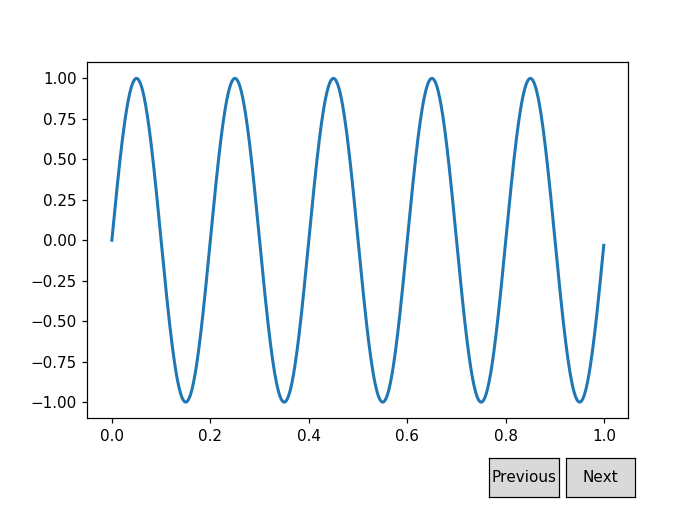

In [3]:
from matplotlib.widgets import Button

%matplotlib notebook

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)


class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

### 2.3: GUI Neutral Widgets

In [ ]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-3, 3), ylim=(-1, 1))

x = np.linspace(-3, 3, 91)
t = np.linspace(1, 25, 30)
X2, T2 = np.meshgrid(x, t)
 
sinT2 = np.sin(2*np.pi*T2/T2.max())
F = 0.9*sinT2*np.sinc(X2*(1 + sinT2))
line = ax.plot(x, F[0, :], color='k', lw=2)[0]

def animate(i):
    line.set_ydata(F[i, :])

anim = FuncAnimation(
    fig, animate, interval=100, frames=len(t)-1)
 
plt.draw()
plt.show()

In [ ]:
import matplotlib.animation as animation
%matplotlib notebook

n = 100
number_of_frames = 10
data = np.random.rand(n, number_of_frames)

def update_hist(num, data):
    plt.cla()
    plt.hist(data[num])

fig = plt.figure()
hist = plt.hist(data[0])

animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(data, ) )
plt.show()

In [ ]:
%matplotlib notebook
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y1 = np.sin(2*np.pi*t) * np.exp(-t/10.)
        y2 = np.cos(2*np.pi*t) * np.exp(-t/10.)
        yield t, y1, y2

data_gen.t = 0

# two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2, color='r')
line = [line1, line2]

# the same axes initalizations as before
for ax in [ax1, ax2]:
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 5)
    ax.grid()

# initialize the data
xdata, y1data, y2data = [], [], []
def run(data):
    # update the data
    t, y1, y2 = data
    xdata.append(t)
    y1data.append(y1)
    y2data.append(y2)

    # axis limits checking
    for ax in [ax1, ax2]:
        xmin, xmax = ax.get_xlim()
        if t >= xmax:
            ax.set_xlim(xmin, 2*xmax)
            ax.figure.canvas.draw()

    # update the data of both line objects
    line[0].set_data(xdata, y1data)
    line[1].set_data(xdata, y2data)

    return line

ani = FuncAnimation(fig, run, data_gen, blit=True, interval=10,
    repeat=False)
plt.show()

### 2.4: Converting interactive plots into videos

In [ ]:
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']

metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')

writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
l, = plt.plot([], [], 'k-o')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

x0, y0 = 0, 0

with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(100):
        x0 += 0.1 * np.random.randn()
        y0 += 0.1 * np.random.randn()
        l.set_data(x0, y0)
        writer.grab_frame()